<a href="https://colab.research.google.com/github/ritik1804k/-ML---Regression-Capstone-Project/blob/main/Supervised_ML_Regression_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - Ritik Koshta


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

A machine learning model to predict the duration of NYC taxi trip.
Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [2]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from haversine import haversine

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Dataset
path = ('/content/drive/MyDrive/Colab Notebooks/Capstone project csv files/NYC Taxi Data.csv')
data = pd.read_csv(path)

### Dataset First View

In [6]:
# First viewing column and the data inside them and how they are arranged
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
#  bottom ten rows of dataframe
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# we also want the size of our data (i.e, Dataset size) 
data.shape

(1458644, 11)

We have 14,58,644 columns & 11 Rows in our dataset.

### Dataset Information

In [9]:
# Dataset Info
# checking for columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicate_rows =  data.duplicated().value_counts()
print(f'All the False value are for non-duplicate rows: {duplicate_rows}')

All the False value are for non-duplicate rows: False    1458644
dtype: int64


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isna().sum().sort_values(ascending = False)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

As we can see there are zero null entries in our dataset.

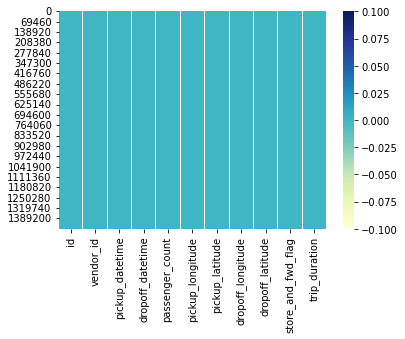

In [12]:
# Visualizing the missing values
# Creating a heatmap of missing values
sns.heatmap(data.isnull(), cmap="YlGnBu")
plt.show()

### What did you know about your dataset?

Few points on our dataset, so that we might get little intution of what we have done in some above codes:

* The size of our data contains 14,58,644 columns & 11 Rows in our dataset.
* There are no duplicate rows in our dataframe.
* As we have also seen that there are zero null entries in our dataset.


## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
#checking features name of our column
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [14]:
# numeric columns
numeric_features = data.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [15]:
# categorical columns
categorical_features = data.describe(include=['object','category']).columns
categorical_features

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [16]:
# Dataset Describe
# computing and displaying summary statistics for dataset
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [17]:
# including all the columns
data.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description 

* **id** -  a unique identifier for each trip

* **vendor_id** - a code indicating the provider associated with the trip record

* **pickup_datetime** - date and time when the meter was engaged

* **dropoff_datetime** - date and time when the meter was disengaged

* **passenger_count** - the number of passengers in the vehicle (driver entered value)

* **pickup_latitude** - the latitude where the meter was engaged

* **dropoff_longitude** - the longitude where the meter was disengaged

* **dropoff_latitude** - the latitude where the meter was disengaged

* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server: Y = store and forward & N = not a stye and forward trip

* **trip_duration**  - duration of the trip in seconds


### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
numeric = data.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {data[num_col].nunique()} uniqueness variable(s)")

vendor_id : 2 uniqueness variable(s)
passenger_count : 10 uniqueness variable(s)
pickup_longitude : 23047 uniqueness variable(s)
pickup_latitude : 45245 uniqueness variable(s)
dropoff_longitude : 33821 uniqueness variable(s)
dropoff_latitude : 62519 uniqueness variable(s)
trip_duration : 7417 uniqueness variable(s)


In [19]:
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(data.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


## 3. ***Data Wrangling***

### Data Wrangling Code

Data preprocessing for EDA purpose.

In [20]:
# pickup datetime
data[["p_ymd", "p_hms"]] = data["pickup_datetime"].str.split(" ", expand=True) 
# dropoff datetime
data[["d_ymd", "d_hms"]] = data["dropoff_datetime"].str.split(" ", expand=True)

# splitting pickup
data[["p_year", "p_month", "p_day"]] = data["p_ymd"].str.split("-", expand=True).astype("int") 
# splitting pickup
data[["p_hour", "p_minute", "p_second"]] = data["p_hms"].str.split(":", expand=True).astype("int") 

# splitting dropoff
data[["d_year", "d_month", "d_day"]] = data["d_ymd"].str.split("-", expand=True).astype("int") 
# splitting dropoff
data[["d_hour", "d_minute", "d_second"]] = data["d_hms"].str.split(":", expand=True).astype("int") 




In [21]:
#Converting timestamp to datetime format to fetch the other details as listed below
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['weekday_num'] = data.pickup_datetime.dt.weekday

In [22]:
# del pickup
del data["pickup_datetime"] 
# del dropoff
del data["dropoff_datetime"] 

In [23]:
# del pickup year month day
del data["p_ymd"] 
# del pickup hour minute second
del data["p_hms"] 
# del dropoff year month day
del data["d_ymd"]
# del dropoff hour minute second 
del data["d_hms"] 
# del taxi id
del data["id"] 

In [24]:
# view
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_year,p_month,...,p_hour,p_minute,p_second,d_year,d_month,d_day,d_hour,d_minute,d_second,weekday_num
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,...,17,24,55,2016,3,14,17,32,30,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,...,0,43,35,2016,6,12,0,54,38,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,...,11,35,24,2016,1,19,12,10,48,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,...,19,32,31,2016,4,6,19,39,40,2
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,...,13,30,55,2016,3,26,13,38,10,5


In [25]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

The haversine formula is used to calculate the great-circle distance (i.e. shortest distance on the surface of a sphere) between two points, given their latitudes and longitudes. It is often used in navigation and location-based applications.

The formula takes as input the latitude and longitude of the two points, and returns the distance between them in a specified unit (e.g. kilometers, miles). 

In [26]:
#Calculate distance and assign new column to the dataframe.
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [27]:
#Calculate Speed in km/h for further insights
data['speed'] = (data.distance/(data.trip_duration/3600))

In [28]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_year,p_month,...,p_second,d_year,d_month,d_day,d_hour,d_minute,d_second,weekday_num,distance,speed
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,...,55,2016,3,14,17,32,30,0,1.498523,11.856445
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,...,35,2016,6,12,0,54,38,6,1.805510,9.803672
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,...,24,2016,1,19,12,10,48,1,6.385107,10.822216
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,...,31,2016,4,6,19,39,40,2,1.485500,12.465738
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,...,55,2016,3,26,13,38,10,5,1.188590,9.836608


### What all manipulations have you done and insights you found?

* Firstly, I have converted timestamp columns(pickup_datetime & dropoff_datetime) to datetime format to fetch some details.

* Then I have assigned some new columns to the dataframe such as weekday, month and pickup_hour with the help of date time formate which will help us understand our data very easily and to gain more insights from the data.

* Described a function (calc_distance) to calculate distance between pickup and dropoff coordinates using Haversine formula.
* Using the distance feature I have calculated the Speed in km/h for further insights.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [29]:
# Chart - 1 visualization code
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

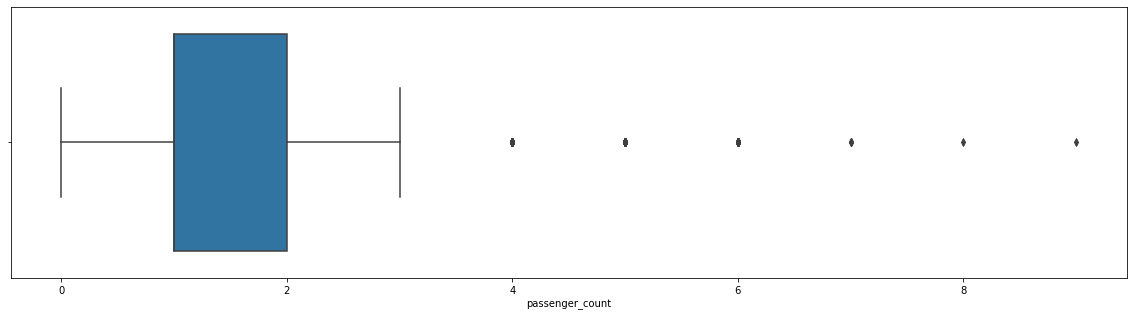

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(data.passenger_count)
plt.show()

##### 1. Why did you pick the specific chart?

The message you want to convey in a clear and visually appealing way.

Perhaps the chart type boxplot is particularly suited to the type of data we have, and the specific configuration of the chart highlights the key insights we want to convey.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with 0 passenger count.
* Few trips consisted of even 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
* Most of trip consist of passenger either 1 or 2.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer** - Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis.

We can also get clear understanding that most of the trips have passengers either 1 or 2. This could mean that they could optimize their pricing and routing strategies to better accommodate smaller groups of passengers. For example, they could offer discounts or promotions for solo riders or couples, or develop algorithms that prioritize matching single riders or couples with nearby drivers.

#### Chart - 2

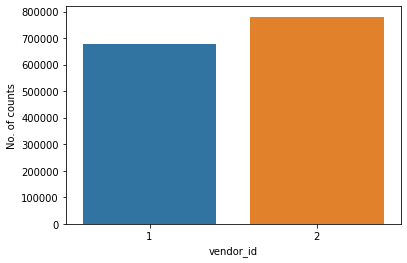

In [31]:
# Chart - 2 visualization code
sns.countplot(data['vendor_id'])
plt.ylabel('No. of counts')
plt.show()

##### 1. Why did you pick the specific chart?

Here we analyze taxi data only for the 2 types of vendors which are listed as 1 and 2 in the datset.

##### 2. What is/are the insight(s) found from the chart?

Though both the vendors seems to have almost equal market share.
But Vendor 2 is evidently more famous among the population as per the above graph.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There could be various reasons, such as Vendor 2 having a better reputation, offering more competitive pricing, providing better customer service, or having a stronger marketing strategy.

#### Chart - 3

In [32]:
print(data['distance'].describe())

count    1.458644e+06
mean     3.440869e+00
std      4.296544e+00
min      0.000000e+00
25%      1.231838e+00
50%      2.093720e+00
75%      3.875343e+00
max      1.240910e+03
Name: distance, dtype: float64


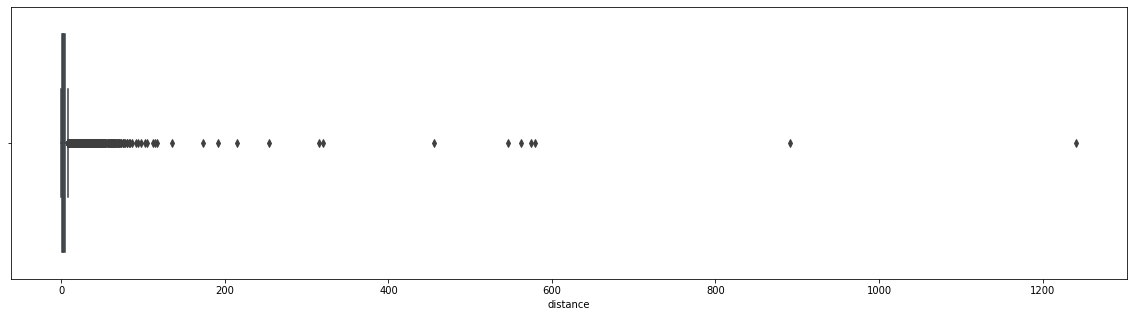

In [33]:
# Chart - 3 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(data['distance'])
plt.show()

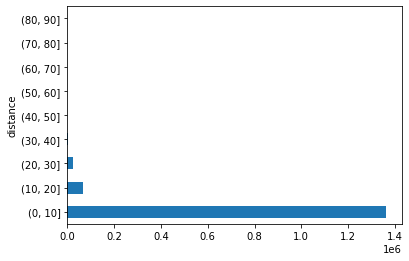

In [34]:
data.distance.groupby(pd.cut(data.distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()

0.2 = 2,00,000, 1.2 = 12,00,000

##### 1. Why did you pick the specific chart?

With the help of boxplot I got better insights about the outliers, and how the distance columns is distributed in the dataset. 

##### 2. What is/are the insight(s) found from the chart?

* There some trips with over 100 km distance.
* Most of the trips are between 10 to 10 km
* Some of the trips distance value is 0 km.
* Mean distance travelled is approx 3.5 kms.
* Standard deviation of 4.3 which shows that most of the trips are limited to the range of 1-10 kms.

In [35]:
print("There are {} trip records with 0 km distance".format(data.distance[data.distance == 0 ].count()))

There are 5897 trip records with 0 km distance


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The information is that there may be an opportunity to offer transportation services for short-distance trips, especially for those trips that are currently registered as 0 km.
This could potentially increase the number of overall trips and generate additional revenue for the business.
* Distance above 400 & 600 km are outlies will definately affect our predicted value.

#### Chart - 4

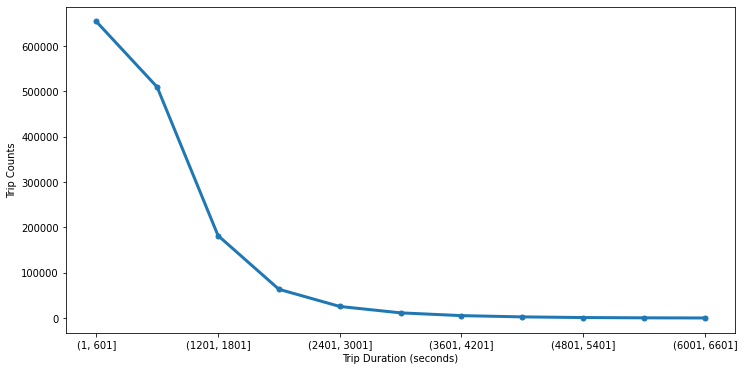

In [36]:
# Chart - 4 visualization code
plt.rcParams['figure.figsize'] = (12,6)
data['trip_duration'].groupby(pd.cut(data['trip_duration'], np.arange(1,7200,600))).count().plot(kind='line', marker='o', markersize=5, linewidth=3)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Counts')
plt.show()

##### 1. Why did you pick the specific chart?

We can visualize the trip duration as it is shown in line graph.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.
* Major part of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These trips ran for more than 20 days, which seems unlikely by the distance travelled.
* All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
* All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
* But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.

#### Chart - 5

In [37]:
data['speed'].describe()

count    1.458644e+06
mean     1.442323e+01
std      1.497755e+01
min      0.000000e+00
25%      9.121287e+00
50%      1.279200e+01
75%      1.784494e+01
max      9.274850e+03
Name: speed, dtype: float64

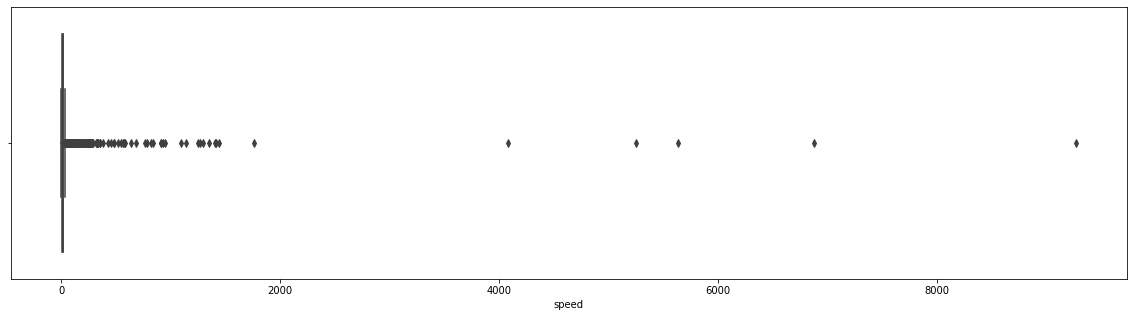

In [38]:
# Chart - 5 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

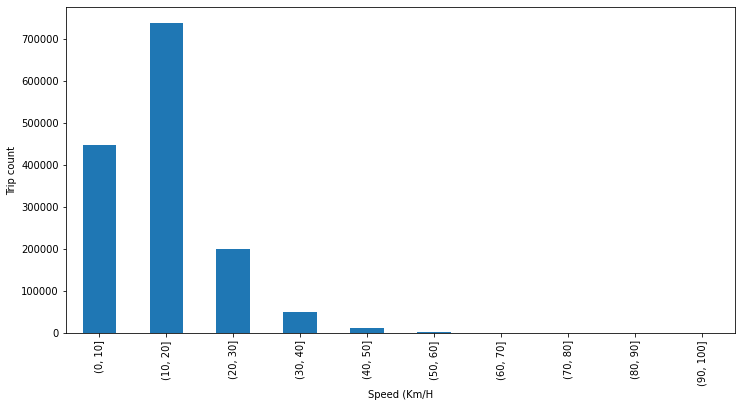

In [39]:
data.speed.groupby(pd.cut(data['speed'], np.arange(0,104,10))).count().plot(kind = 'bar')
plt.xlabel('Speed (Km/H')
plt.ylabel('Trip count')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked two types of charts in the first one all the data from speed column is shown in boxplot and second chart shows some specific amount of distribution. 

##### 2. What is/are the insight(s) found from the chart?

* Trips over 30 km/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 km/h on state controlled highways.
* Mostly trips are done at a speed range of 10-20 km/h with an average speed of around 14 km/h.

Please take a look at the speed range ditribution with the help of bar graph.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There may be an opportunity to provide faster transportation services, especially for trips that typically take a long time at the current average speed. For example, if a trip takes an hour at 14 km/h, it could potentially take only 30 minutes at 28 km/h. 

This could potentially increase customer satisfaction and generate more revenue for the business by providing a faster and more efficient service.

#### Chart - 6

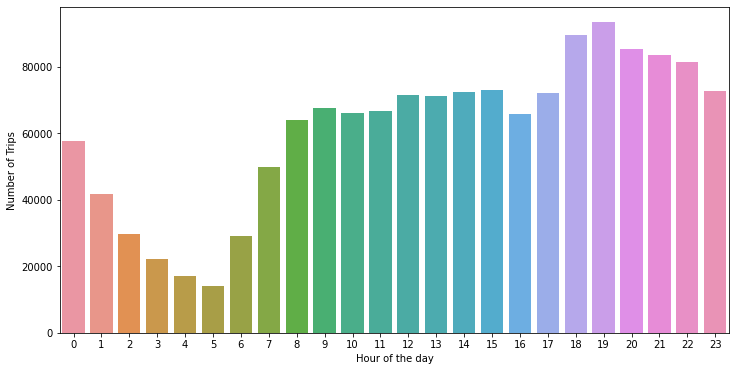

In [40]:
# Chart - 6 visualization code
sns.countplot(data['d_hour'])
plt.ylabel('Number of Trips')
plt.xlabel('Hour of the day')
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of trip booked in different hour of the day.

##### 2. What is/are the insight(s) found from the chart?

It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One positive business insight that can be drawn from this information is that it may be beneficial to focus operations and staffing around the peak demanding hours.

#### Chart - 7

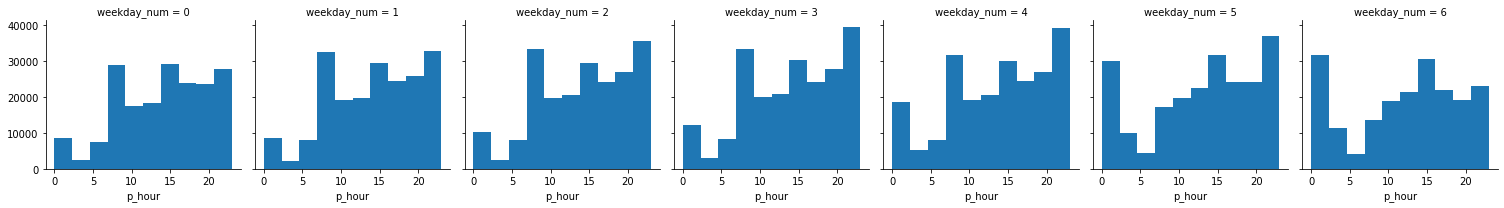

In [41]:
# Chart - 7 visualization code
n = sns.FacetGrid(data, col='weekday_num')
n.map(plt.hist, 'p_hour')
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of trip in differnt days of  week.

Here, 0 to 6 means Monday to Sunday.

##### 2. What is/are the insight(s) found from the chart?

* Taxi pickups increased in the late night hours over the weekend possibly due to more outstation rides or for the late night leisures nearby activities.
* Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.
* Taxi pickups seems to be consistent across the week at 15 Hours i.e. at 3 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We found that there is a particular time or location where demand is highest, which could be used to inform the development of targeted marketing campaigns or promotions to encourage more trips during these times.

#### Chart - 8

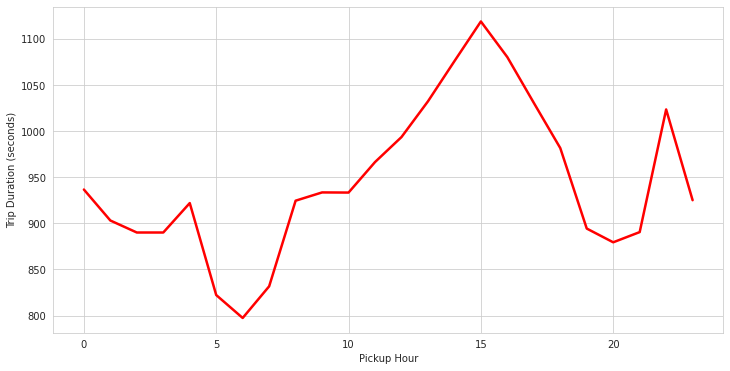

In [42]:
# Chart - 8 visualization code
group1 = data.groupby('p_hour').trip_duration.mean()
sns.set_style('whitegrid')
sns.lineplot(group1.index, group1.values ,color='red', linewidth=2.5)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

##### 1. Why did you pick the specific chart?

To illustrate the understanding between two featurs - (pickup_hour and trip_duration)

##### 2. What is/are the insight(s) found from the chart?

* Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
* Average trip duration is generally highest around 3 PM during the busy streets.
* Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If there are longer trip duration during peak trafficn it can cause customer dissatisfaction, which may be beneficial to explore alternative transportation methods or routes that can help reduce travel time during these periods.

#### Chart - 9

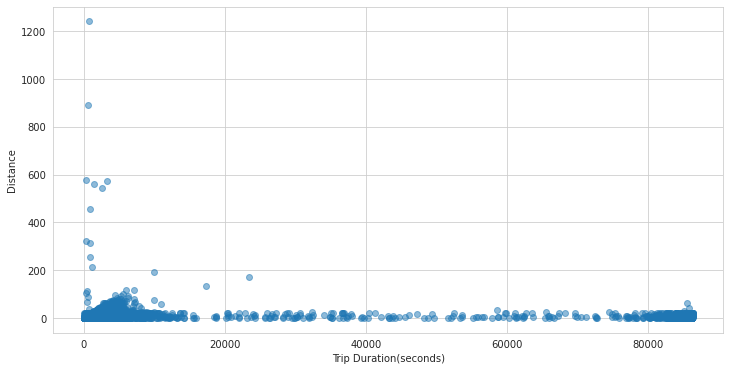

In [43]:
# Chart - 9 visualization code
data = data[data['trip_duration'] <= 86400]
plt.scatter(data.trip_duration, data.distance ,  alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration(seconds)')
plt.show()

Let's focus on the graph area where distance is < 50 km and duration is < 1000 seconds.

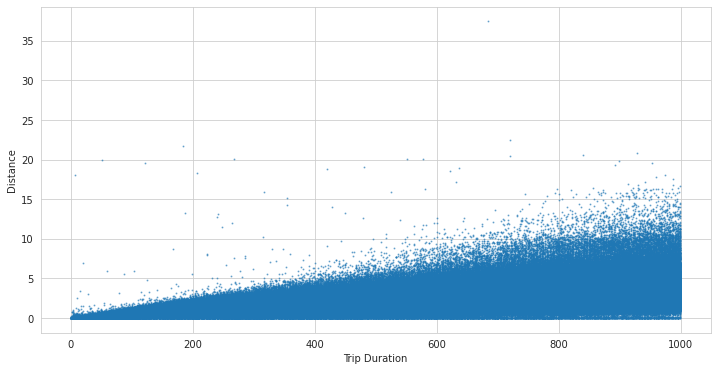

In [44]:
dur_dist = data.loc[(data.distance < 50) & (data.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the relationship between Distance covered and respective trip duration

##### 2. What is/are the insight(s) found from the chart?

* There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration.
* Initially there is some proper correlation between the distance covered and the trip duration in the graph. but later on it all seems uncorrelated.
* There were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We should remove those trips which covered 0 km distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

#### Chart - 10

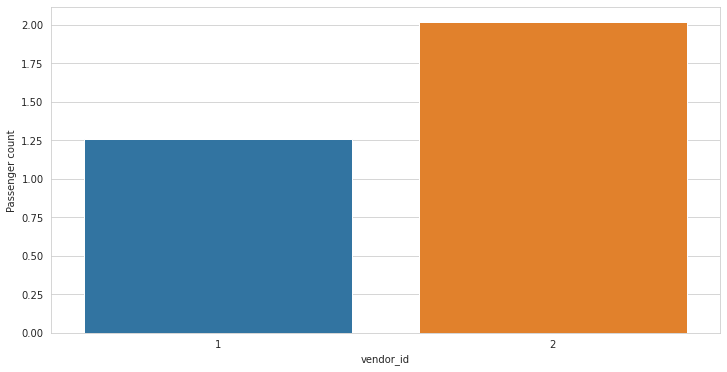

In [45]:
# Chart - 10 visualization code
group9 = data.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

##### 1. Why did you pick the specific chart?

To show number of passenger taking on the specific vendor id through bar plot.

##### 2. What is/are the insight(s) found from the chart?

Clear difference between the two operators for the average passenger count in all trips. It seems that vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

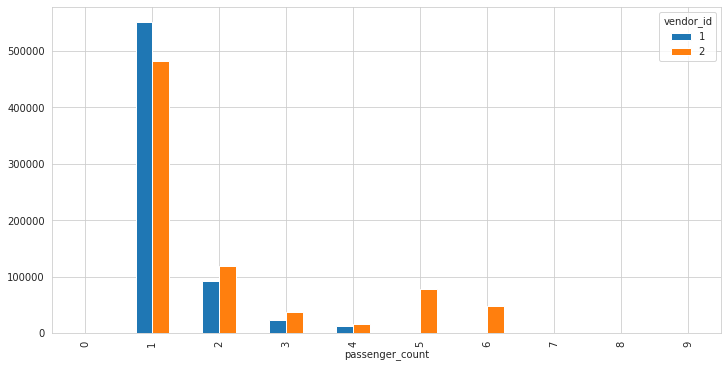

In [46]:
# Chart - 11 visualization code
data.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot\
("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of trips between "passenger_count" & compairing both the "vendor_id".

##### 2. What is/are the insight(s) found from the chart?

Both types of vendors agrees to take passenger if they are 1 or 2 , but in case of higher no. of passenger vendor id 2 is more active.

We can also remove passenger count above 6 it could be an outlier treatment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It seems that most of the big cars are served by the Vendor 2 including minivans because other than passenger 1, vendor 2 has majority in serving more than 1 passenger count and that explains it greater share of the market.

#### Chart - 12

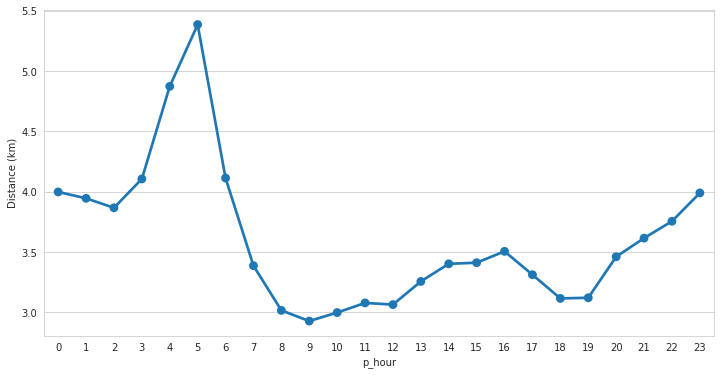

In [47]:
# Chart - 12 visualization code
group5 = data.groupby('p_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()

##### 1. Why did you pick the specific chart?

Relation of distance travelled in different kilometers.

##### 2. What is/are the insight(s) found from the chart?

* Trip distance is highest during early morning hours which can account for some things like:
    1. Outstation trips taken during the weekends.
    2. Longer trips towards the city airport which is located in the outskirts of the city.
* Trip distance is fairly equal from morning till the evening varying around 3 - 3.5 kms.
* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the time of day, to encourage customers to take longer trips during off-peak hours when demand is lower. This could help to optimize resource utilization and generate more revenue during periods of low demand.

#### Chart - 13

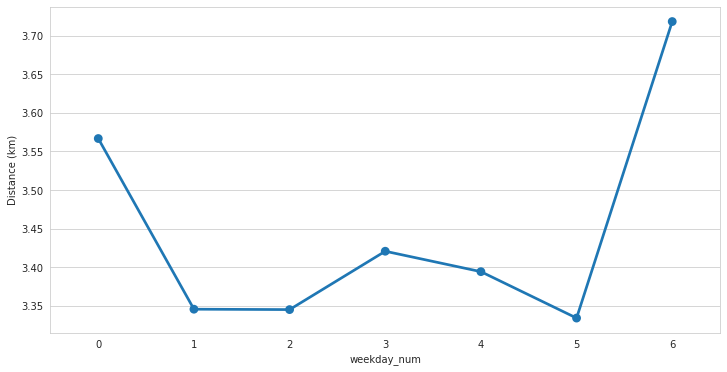

In [48]:
# Chart - 13 visualization code
group6 = data.groupby('weekday_num').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (km)')
plt.show()

##### 1. Why did you pick the specific chart?

Here in this plainplot we actually see the distance travelled in different days of the week.

##### 2. What is/are the insight(s) found from the chart?

So it's a fairly equal distribution with average distance metric verying around 3.5 km/h with Sunday being at the top may be due to outstation trips or night trips towards the airport.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There may be an opportunity to offer targeted services or promotions on Sundays to cater to customers taking longer trips. This could include offering discounts on longer trips or providing in-ride entertainment or refreshments to improve customer satisfaction.

#### Chart - 14 - Correlation Heatmap

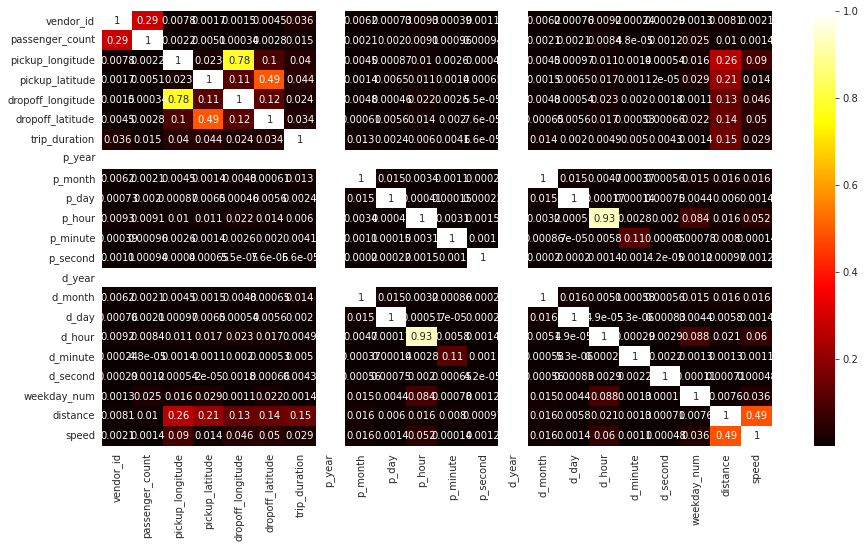

In [49]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True,cmap="hot")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Some combinations of features shows slight correlation but not above 0.6.
* Some features are infact negatively correlated.
* But most of the features shows no correlation. Which is a good thing.

All in all, we have a very good pack of attributes to train our model. Let's move ahead.

#### Chart - 15 - Pair Plot 

In [50]:
updated_numeric_features = data.describe().columns
print(updated_numeric_features)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'p_year',
       'p_month', 'p_day', 'p_hour', 'p_minute', 'p_second', 'd_year',
       'd_month', 'd_day', 'd_hour', 'd_minute', 'd_second', 'weekday_num',
       'distance', 'speed'],
      dtype='object')


Let's try to plot some scatter plot between independent with the dependent variable

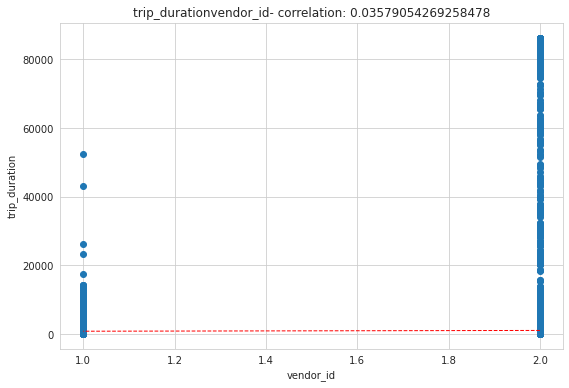

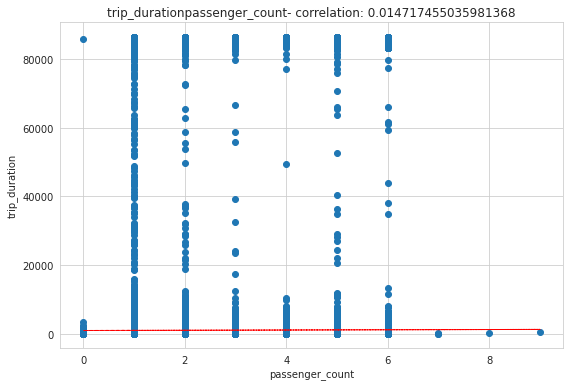

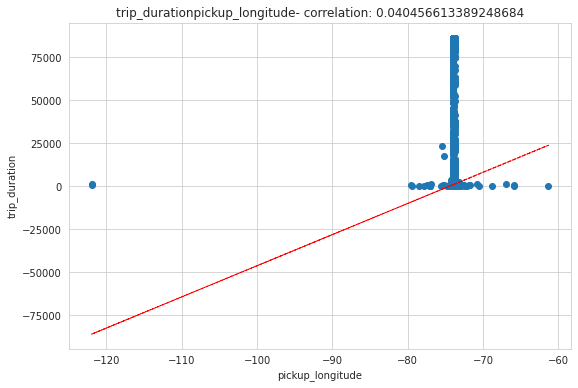

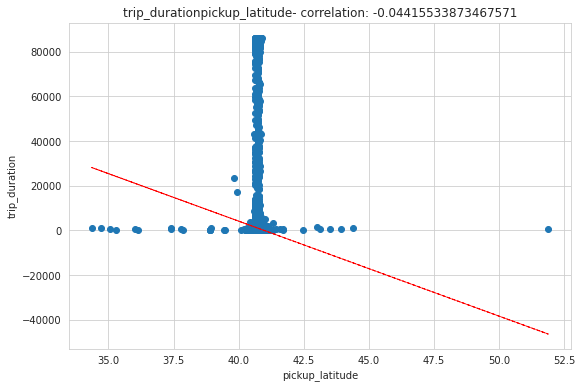

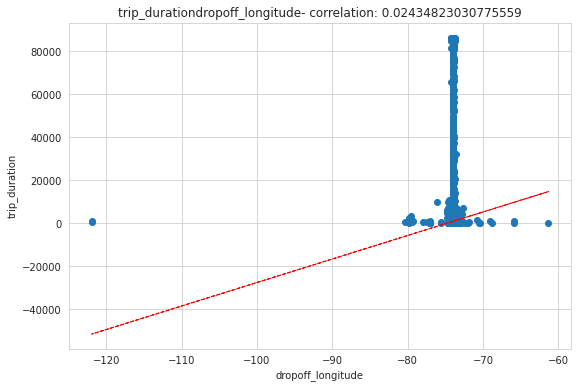

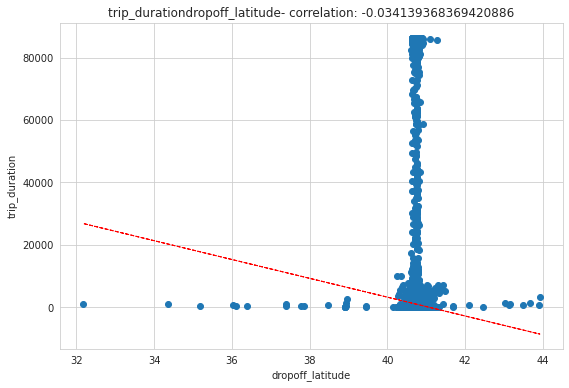

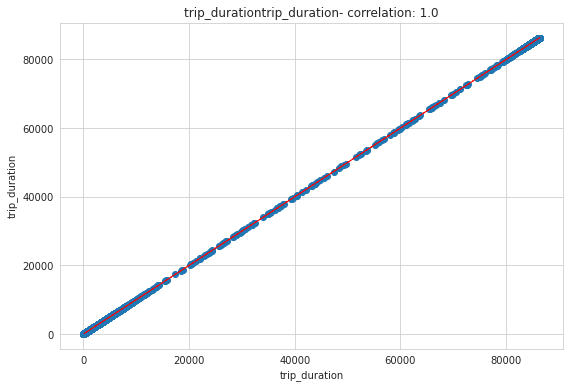

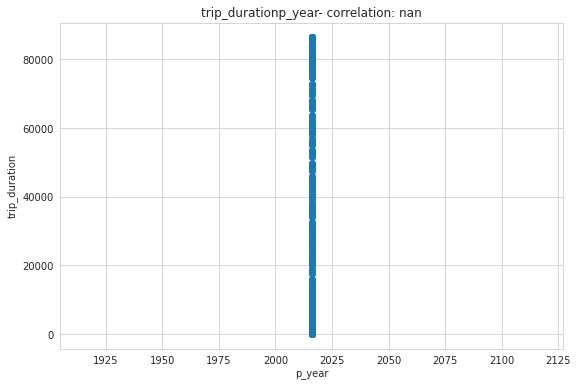

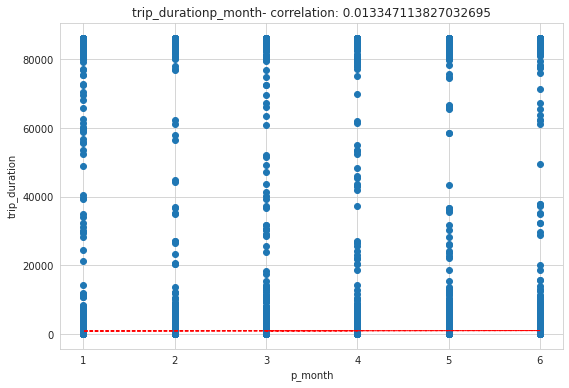

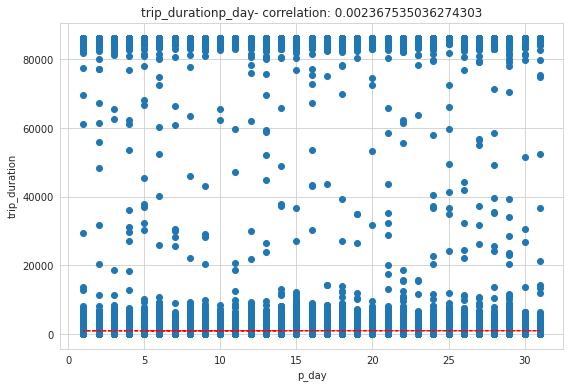

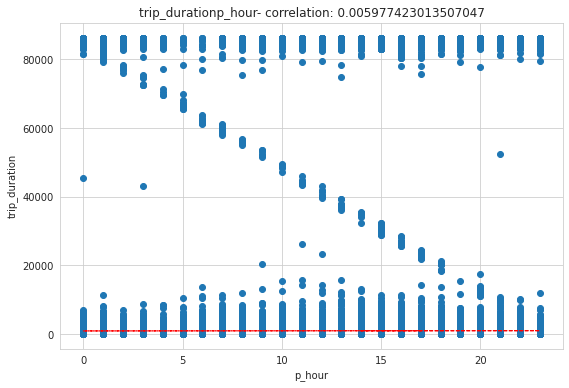

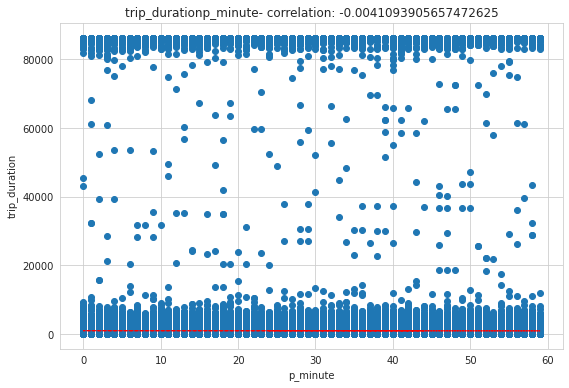

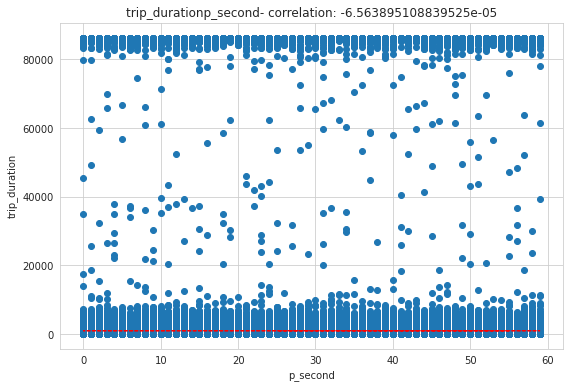

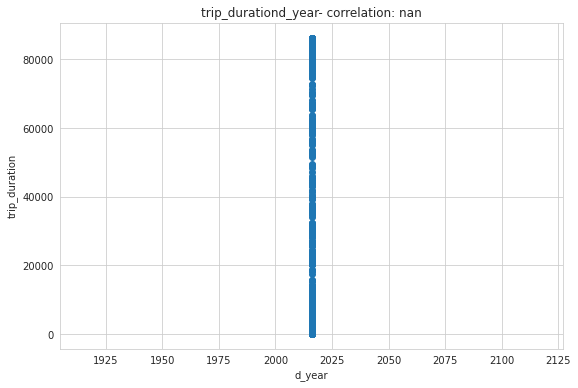

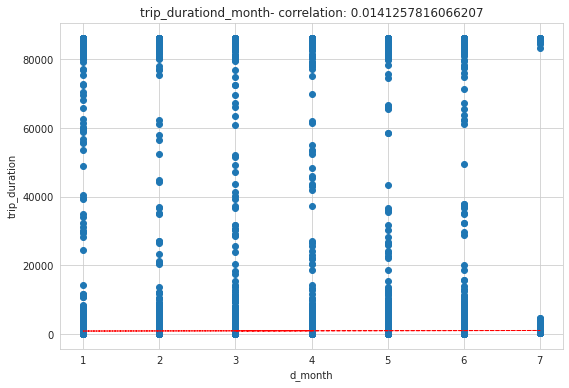

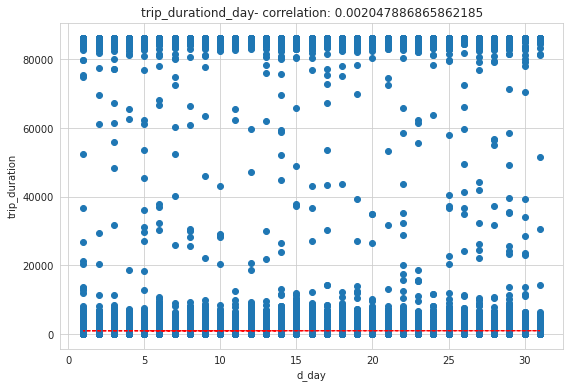

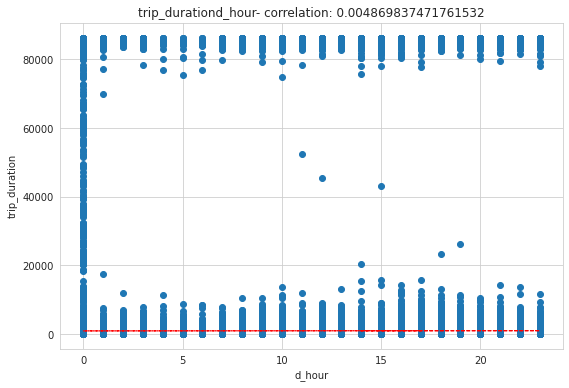

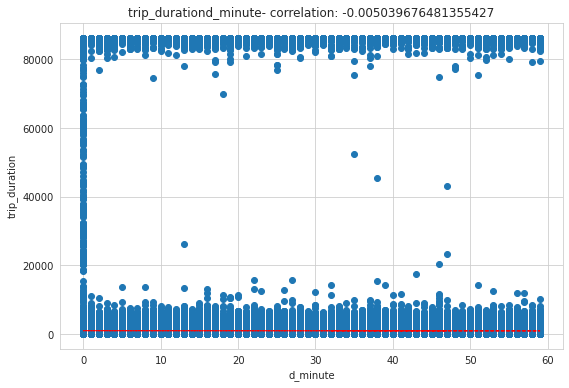

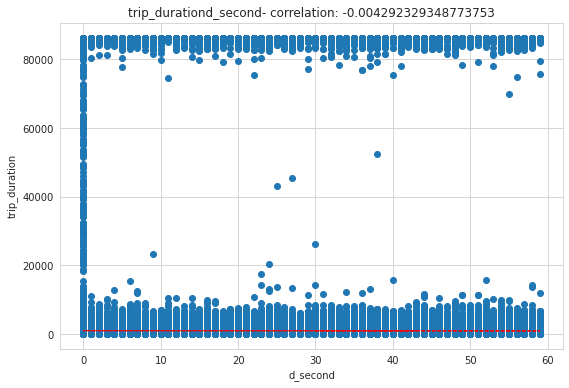

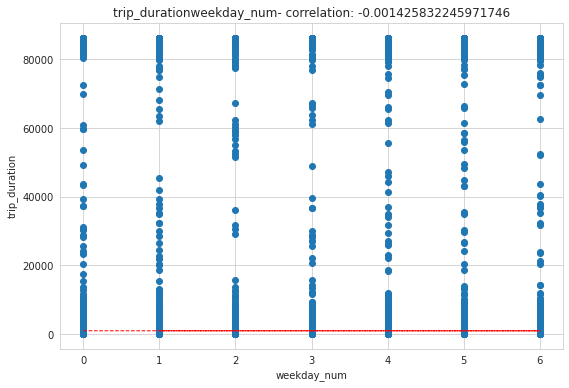

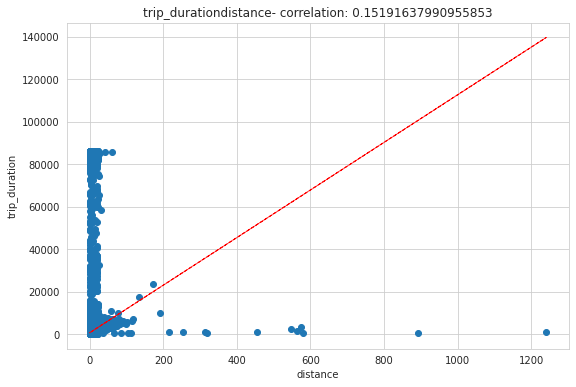

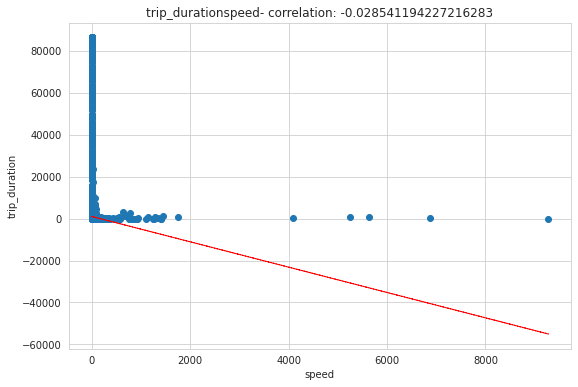

In [51]:
# Pair Plot visualization code
for col in updated_numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = data[col]
   label = data['trip_duration']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('trip_duration')
   ax.set_title('trip_duration' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(data[col], data['trip_duration'], 1)
   y_hat = np.poly1d(z)(data[col])
 
   plt.plot(data[col], y_hat, "r--", lw=1)
 
plt.show()

In [52]:
# categorical columns
updated_categorical_features = data.describe(include=['object','category']).columns
print(updated_categorical_features)

Index(['store_and_fwd_flag'], dtype='object')


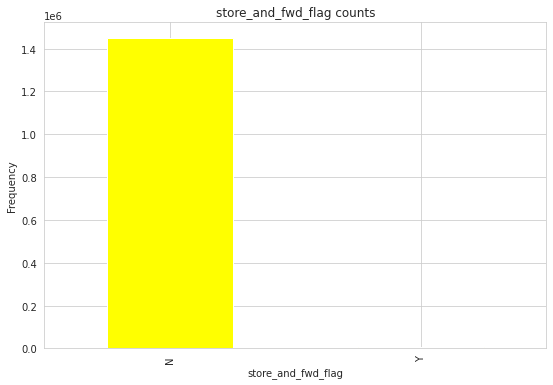

In [53]:
# plot a bar plot for each categorical feature count  
for col in updated_categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='yellow')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

I have shown the relation between all the numerical and categorical feature with our dependent variable (trip_duration).

##### 2. What is/are the insight(s) found from the chart?

We can clearly see none of our numeric featurs are highly correlated with our dependent variable which is a good thing.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [57]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
print(data.isnull().sum())

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
p_year                0
p_month               0
p_day                 0
p_hour                0
p_minute              0
p_second              0
d_year                0
d_month               0
d_day                 0
d_hour                0
d_minute              0
d_second              0
weekday_num           0
distance              0
speed                 0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

We can clearly see there are no missing values in out dataset so we can move forward to outlier treatment.

### 2. Handling Outliers

In [58]:
# Handling Outliers & Outlier treatments
data['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [59]:
data = data[data['passenger_count'] <= 6]
data = data[data['passenger_count'] != 0]

In [60]:
# Set a range for distance feature
data = data[data['distance'] <= 400]

In [61]:
data = data[data['speed'] <= 104]

Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.

There are some trips with even  0
  passenger count.

Most of the trips are between 10 to 10 km. that's why I removed distance above 600km wihich will act as an outlier.

Trips over 30 km/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 km/h on state controlled highways

In [62]:
data.shape

(1458418, 23)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers can have a major impact on our machine learning models, as they can skew the results and reduce the accuracy of the models. 

We used Deletion, simply removed the rows from our dataset that contain outlier values.

### 3. Categorical Encoding

In [63]:
# numeric columns
updated_numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'p_year',
       'p_month', 'p_day', 'p_hour', 'p_minute', 'p_second', 'd_year',
       'd_month', 'd_day', 'd_hour', 'd_minute', 'd_second', 'weekday_num',
       'distance', 'speed'],
      dtype='object')

In [64]:
# Encode your categorical columns
updated_categorical_features

Index(['store_and_fwd_flag'], dtype='object')

In [65]:
data['store_and_fwd_flag'].value_counts()

N    1450377
Y       8041
Name: store_and_fwd_flag, dtype: int64

In [66]:
# creating dummies
data = pd.get_dummies(data, columns=['store_and_fwd_flag'],prefix=["Flag"])

In [67]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,p_year,p_month,p_day,...,d_month,d_day,d_hour,d_minute,d_second,weekday_num,distance,speed,Flag_N,Flag_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,2016,3,14,...,3,14,17,32,30,0,1.498523,11.856445,1,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,2016,6,12,...,6,12,0,54,38,6,1.805510,9.803672,1,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,2016,1,19,...,1,19,12,10,48,1,6.385107,10.822216,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2016,4,6,...,4,6,19,39,40,2,1.485500,12.465738,1,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,2016,3,26,...,3,26,13,38,10,5,1.188590,9.836608,1,0


This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server: Y = store and forward & N = not a stye and forward trip

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Label encoding** was used in this dataset, label encoding encoding technique used to convert categorical data into numerical data.

It is important to note that label encoding may not always be the best approach, especially when dealing with categorical data with a large number of unique categories, but in here there were sufficient categories that can easily be labelled.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [68]:
# Expand Contraction

#### 2. Lower Casing

In [69]:
# Lower Casing

#### 3. Removing Punctuations

In [70]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [71]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [72]:
# Remove Stopwords

In [73]:
# Remove White spaces

#### 6. Rephrase Text

In [74]:
# Rephrase Text

#### 7. Tokenization

In [75]:
# Tokenization

#### 8. Text Normalization

In [76]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [77]:
# POS Taging

#### 10. Text Vectorization

In [78]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [79]:
data.drop(columns=['Flag_N'], axis=1, inplace=True)

In [80]:
# Manipulate Features to minimize feature correlation and create new features
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [81]:
 calc_vif(data[[i for i in data.describe().columns if i not in ['trip_duration']]])

,variables,VIF
0,vendor_id,1.097998e+00
1,passenger_count,1.091144e+00
2,pickup_longitude,2.856352e+00
3,pickup_latitude,1.451610e+00
4,dropoff_longitude,2.793434e+00
5,dropoff_latitude,1.363893e+00
6,p_year,0.000000e+00
7,p_month,1.829227e+06
8,p_day,5.359392e+04
9,p_hour,5.813083e+01


In [82]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = data.skew().sort_values(ascending=False).to_frame().head()
skew_value

,0
trip_duration,25.272617
Flag_Y,13.355846
distance,3.183922
passenger_count,2.128110
speed,1.441414


#### 2. Feature Selection

In [83]:
# Select your features wisely to avoid overfitting
features = data.describe().columns
features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'p_year',
       'p_month', 'p_day', 'p_hour', 'p_minute', 'p_second', 'd_year',
       'd_month', 'd_day', 'd_hour', 'd_minute', 'd_second', 'weekday_num',
       'distance', 'speed', 'Flag_Y'],
      dtype='object')

In [84]:
Features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'p_year',
       'p_month', 'p_day', 'p_hour', 'p_minute', 'p_second', 'd_year',
       'd_month', 'd_day', 'd_hour', 'd_minute', 'd_second', 'weekday_num',
       'distance', 'speed', 'Flag_Y']

##### What all feature selection methods have you used  and why?

 VIF (Variance Inflation Factor) feature values are used to check for multicollinearity among the variables.

##### Which all features you found important and why?

Features found important - ['vendor_id', 'passenger_count', 'weekday', 'month', 'weekday_num', 'pickup_hour', 'distance', 'speed'] 

These features are selected because their VIF value lies below 5 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [85]:
data['trip_duration'].sort_values(ascending=False)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
           ...  
1165514        1
346959         1
918415         1
533799         1
451396         1
Name: trip_duration, Length: 1458418, dtype: int64

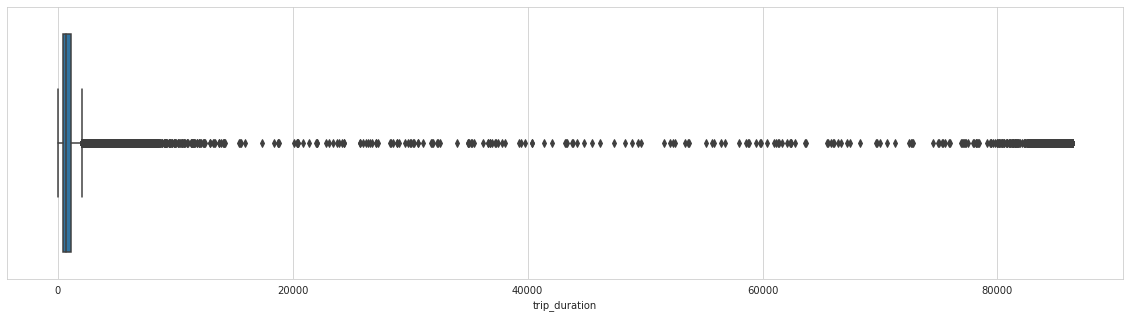

In [86]:
plt.figure(figsize = (20,5))
sns.boxplot(data['trip_duration'])
plt.show()

In [87]:
# Transform Your data
independent_variable = data[Features]
dependent_variable = (data['trip_duration'])

For independent variables,

Scaling and normalization: This involves z-score, scaling the data so that all the variables are on a similar scale, and normalization of the data so that it has a standard distribution. 

For dependent variable,

Log transformation: Log transformation is used to transform data that is highly skewed or has a long tail, in order to make it more normally distributed.

### 6. Data Scaling

In [88]:
# Scaling your data
X = independent_variable
y = dependent_variable

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [89]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [90]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1166734, 22)
(291684, 22)


##### What data splitting ratio have you used and why? 

Splitting ratio used her is 4:1 in the first attempt to check the accuracy of predicted value.

In [91]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

It is a data preprocessing technique used in machine learning to scale features to a specified range. It scales the data to a fixed range of [0, 1].

It is also useful when features have different scales or ranges and you want to normalize them to a common scale.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [92]:
# ML Model - 1 Implementation

reg = LinearRegression().fit(X_train, y_train)

# Fit the Algorithm

Regression_score = reg.score(X_train, y_train)

# Predict on the model
print(f'Regression score {Regression_score}')

Regression score 0.9050743586232017


In [93]:
# intercept value
reg.intercept_

-630.0293591462134

In [94]:
# all the coefficents value
reg.coef_

array([ 1.91946478e+01, -3.22152138e+00, -2.44597868e+03,  6.28555421e+02,
        2.06285513e+03,  8.99756647e+02, -2.76719220e-07, -1.18030657e+07,
       -2.33360308e+06, -7.45812713e+04, -3.19242600e+03, -5.52129376e+01,
        3.95812094e-08,  1.41636708e+07,  2.33360467e+06,  7.45697291e+04,
        3.18493248e+03,  4.65249257e+01,  2.07527387e+01,  4.64169087e+03,
       -9.15151109e+02, -1.75344277e+01])

In [95]:
# getting the predicition on test data
y_pred = reg.predict(X_test)
y_pred

array([924.00179211, 823.99077221, 321.72674791, ..., 859.56115272,
       468.27519915, 603.07007431])

In [96]:
# getting the predicition on train data
y_pred_train = reg.predict(X_train)
y_pred_train

array([689.27803009, 790.16064694, 396.10149408, ..., 463.93132074,
       943.38671365, 799.71583621])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart
print('Train Data Evaluation metric Score Chart.' )
MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE :" , MSE)

MAE  = mean_absolute_error((y_train), (y_pred_train))
print("MAE :" , MAE)

MAPE  = mean_absolute_percentage_error((y_train), (y_pred_train))
print("MAPE :" , MAPE)

r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)

Train Data Evaluation metric Score Chart.
MSE : 964944.7117279813
MAE : 57.9277039255381
MAPE : 0.1511514834453103
R2 : 0.9050743586232017


In [98]:
# Visualizing evaluation Metric Score chart
print('Test Data Evaluation metric Score Chart.' )
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

MAE  = mean_absolute_error((y_test), (y_pred))
print("MAE :" , MAE)

MAPE  = mean_absolute_percentage_error((y_test), (y_pred))
print("MAPE :" , MAPE)

r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)


Test Data Evaluation metric Score Chart.
MSE : 1298578.3061326134
MAE : 60.595106835576864
MAPE : 0.15371764679225955
R2 : 0.8648385227715186


#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define a dictionary of hyperparameters and their possible values
param_grid = {'normalize': [True, False], 'fit_intercept': [True, False]}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(reg, param_grid, cv=5)

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [100]:
# Retrieving the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_score = best_model.score(X_test,y_test)
print(f'Test Score of GridSearch CV = {test_score}' )

Test Score of GridSearch CV = 0.8702137394625512


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV to optimize my model and to get the best possible test score.
Ihave also tried my linear regression model with lasso and ridge but it did'nt worked out as these two were taking alot of tome to exicute i.e., I droped the idea 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

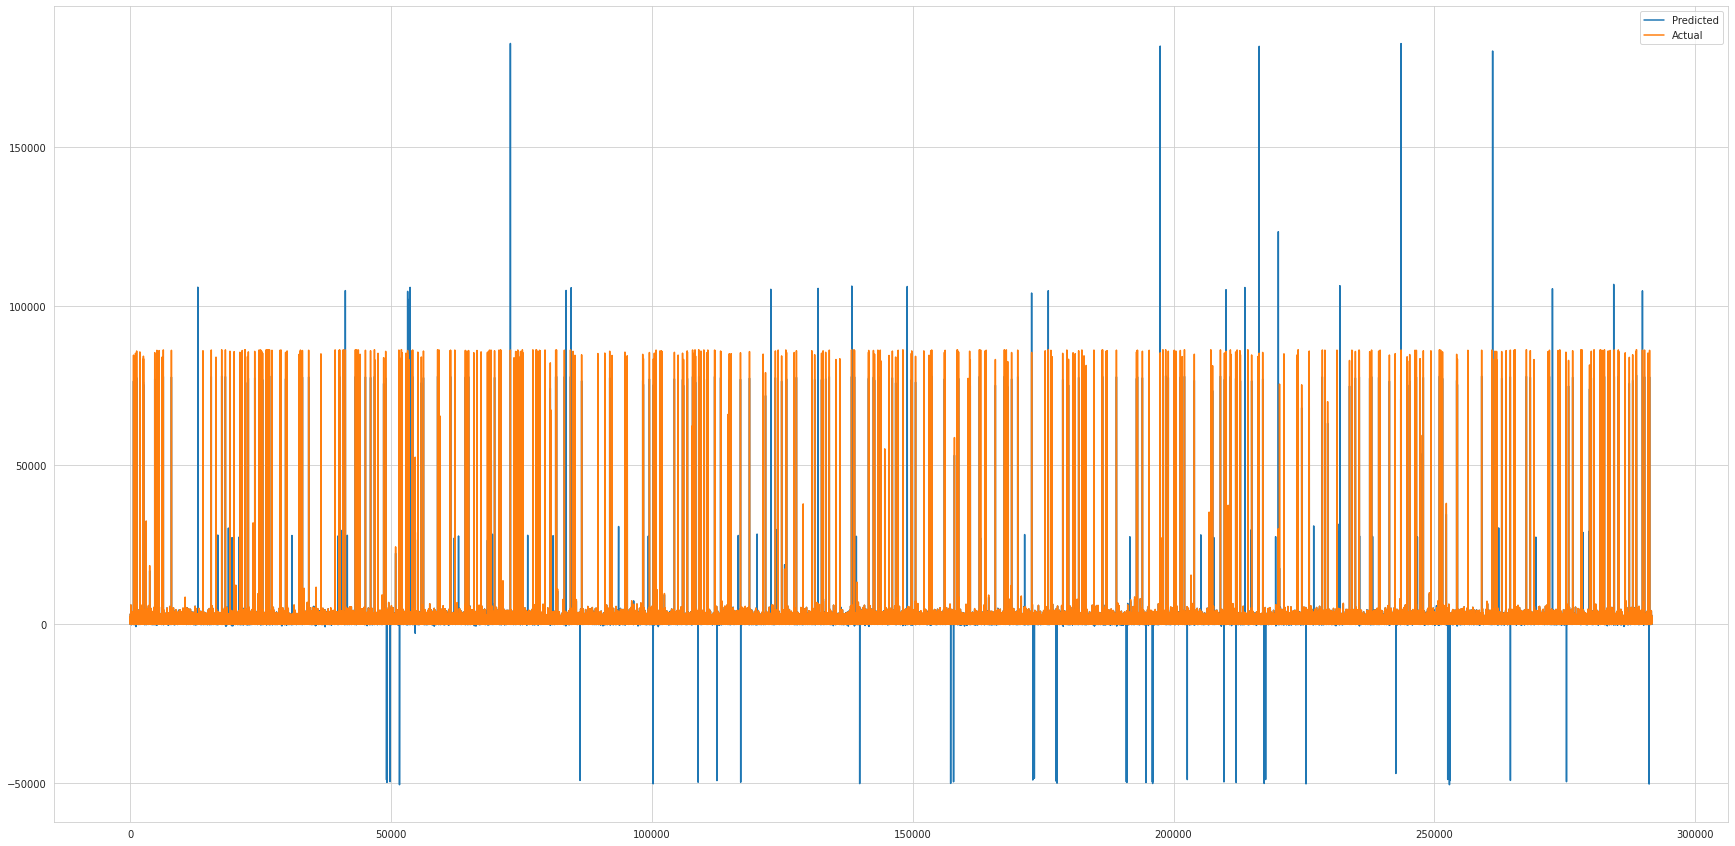

In [101]:
plt.figure(figsize=(30,15))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [104]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [107]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [108]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***